In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score 
import seaborn as sns

In [107]:
#importando os dados csv e alterando os nomes da coluna
df = pd.read_csv('dados_produtos.csv', sep=',')
df.head(10)
dic = {'product_name' : 'Produto', 'rating' : 'Nota', 'rating_count' : 'Qtd. Notas', 'purchased' : 'Compras'}
df.rename(columns=dic, inplace=True)
df.head()

,Produto,Nota,Qtd. Notas,Compras
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [108]:
#variáveis que buscam colunas específicas para a criação do boxplot
produto = df['Produto']
nota = df['Nota']
notaGeral = df['Qtd. Notas']

Text(0, 0.5, 'Notas dos produtos')

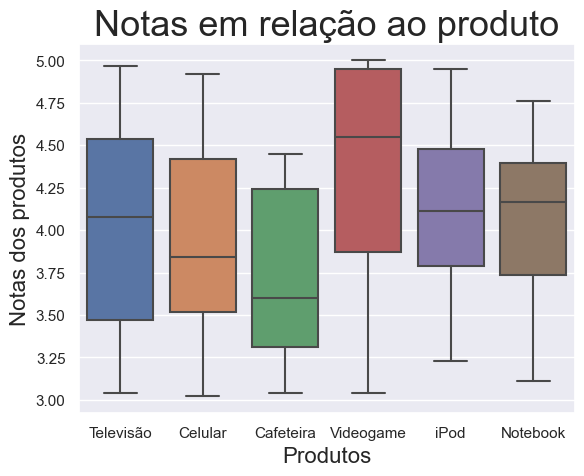

In [109]:
# Criação do Boxplot
sns.boxplot(y = nota, x = produto)
sns.set(font_scale = 1)
plt.title('Notas em relação ao produto', fontsize = 26)
plt.xlabel('Produtos', fontsize = 16)
plt.ylabel('Notas dos produtos', fontsize = 16)


Text(0, 0.5, 'Notas Gerais dos produtos')

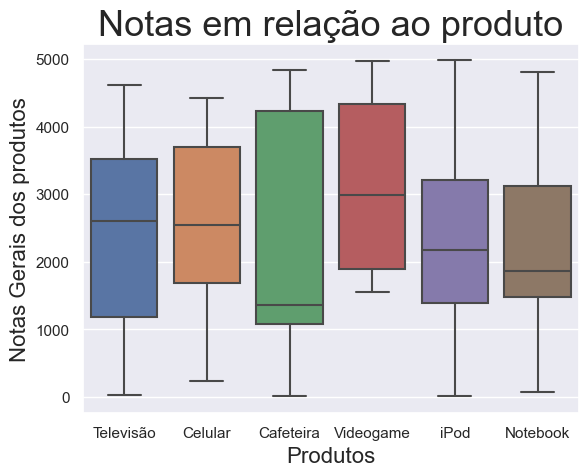

In [110]:
# Criação do Boxplot
sns.boxplot(y = notaGeral, x = produto)
sns.set(font_scale = 1)
plt.title('Notas em relação ao produto', fontsize = 26)
plt.xlabel('Produtos', fontsize = 16)
plt.ylabel('Notas Gerais dos produtos', fontsize = 16)

In [111]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produto     100 non-null    object 
 1   Nota        100 non-null    float64
 2   Qtd. Notas  100 non-null    int64  
 3   Compras     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [112]:
df.describe()

,Nota,Qtd. Notas,Compras
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [113]:
#Retornando quantidade e porcentagem de compras

numCompras = df['Compras'].count()
numComprasFeitas = df['Compras'].sum()
numComprasNfeitas = (numCompras - numComprasFeitas)
print(f'Número de compras: {numCompras}')
print(f'Número de compras feitas: {numComprasFeitas}')
print(f'Número de compras não feitas: {numComprasNfeitas}')
print('-' * 100)
porcCompras = (numComprasFeitas / numCompras) *100
porcComprasNfeitas = (numComprasNfeitas / numCompras) * 100
print(f'Porcentagem de compras feitas: {porcCompras}')
print(f'Porcentagem de compras não realizadas: {porcComprasNfeitas}')

Número de compras: 100
Número de compras feitas: 55
Número de compras não feitas: 45
----------------------------------------------------------------------------------------------------
Porcentagem de compras feitas: 55.00000000000001
Porcentagem de compras não realizadas: 45.0


In [128]:
#transformando em arrays

compra = df['Compras']
notas = nota.array
compras = compra.array
print(notas)
print(compras)

<PandasArray>
[3.04, 3.46, 3.25, 3.77,  5.0, 3.98,  3.5, 4.76, 3.94, 4.68, 4.43, 3.14, 4.42,
 3.14, 3.62,  4.1, 3.93, 4.61, 4.18, 3.11, 4.24, 4.95, 4.49,  3.6, 4.92, 3.12,
 4.89, 3.76, 3.76, 4.94, 3.02, 4.12, 3.23, 4.45, 4.08,  4.0, 3.31, 3.04,  4.8,
 4.31, 3.82, 3.45, 3.05, 3.69, 3.45, 4.98, 4.96, 3.75,  5.0, 3.39, 3.33, 4.95,
  4.8, 4.24, 4.97, 4.23, 4.68, 3.51, 3.16, 4.99, 4.24, 3.49, 4.11, 4.68, 4.39,
 3.71, 4.55, 3.52, 4.47, 4.23, 4.01, 4.67, 3.79, 3.04, 3.44, 3.78, 3.87, 3.69,
  4.6, 4.42, 3.38, 4.33, 3.81, 4.36, 4.29, 4.14, 4.12,  3.7, 4.81, 3.84, 3.99,
 4.64, 4.35, 4.15, 4.78, 4.44, 4.66, 4.33,  3.3, 4.08]
Length: 100, dtype: float64
<PandasArray>
[    'Comprou', 'Não Comprou', 'Não Comprou',     'Comprou',     'Comprou',
 'Não Comprou', 'Não Comprou', 'Não Comprou',     'Comprou', 'Não Comprou',
 'Não Comprou',     'Comprou',     'Comprou', 'Não Comprou',     'Comprou',
     'Comprou',     'Comprou',     'Comprou',     'Comprou', 'Não Comprou',
 'Não Comprou', 'Não Comprou',  

[Text(0.8536585365853658, 0.98, '3.04 <= 4.98\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = Comprou'),
 Text(0.8211382113821138, 0.94, '3.04 <= 4.93\ngini = 0.5\nsamples = 78\nvalue = [38, 40]\nclass = Não Comprou'),
 Text(0.7398373983739838, 0.9, '3.04 <= 4.77\ngini = 0.5\nsamples = 73\nvalue = [37, 36]\nclass = Comprou'),
 Text(0.6747967479674797, 0.86, '3.04 <= 4.665\ngini = 0.499\nsamples = 67\nvalue = [32, 35]\nclass = Não Comprou'),
 Text(0.6422764227642277, 0.82, '3.04 <= 4.455\ngini = 0.499\nsamples = 62\nvalue = [32, 30]\nclass = Comprou'),
 Text(0.6097560975609756, 0.78, '3.04 <= 3.96\ngini = 0.497\nsamples = 56\nvalue = [26, 30]\nclass = Não Comprou'),
 Text(0.43902439024390244, 0.74, '3.04 <= 3.765\ngini = 0.494\nsamples = 36\nvalue = [20, 16]\nclass = Comprou'),
 Text(0.35772357723577236, 0.7, '3.04 <= 3.695\ngini = 0.497\nsamples = 28\nvalue = [13, 15]\nclass = Não Comprou'),
 Text(0.2926829268292683, 0.66, '3.04 <= 3.515\ngini = 0.499\nsamples = 23\nvalue = [12, 1

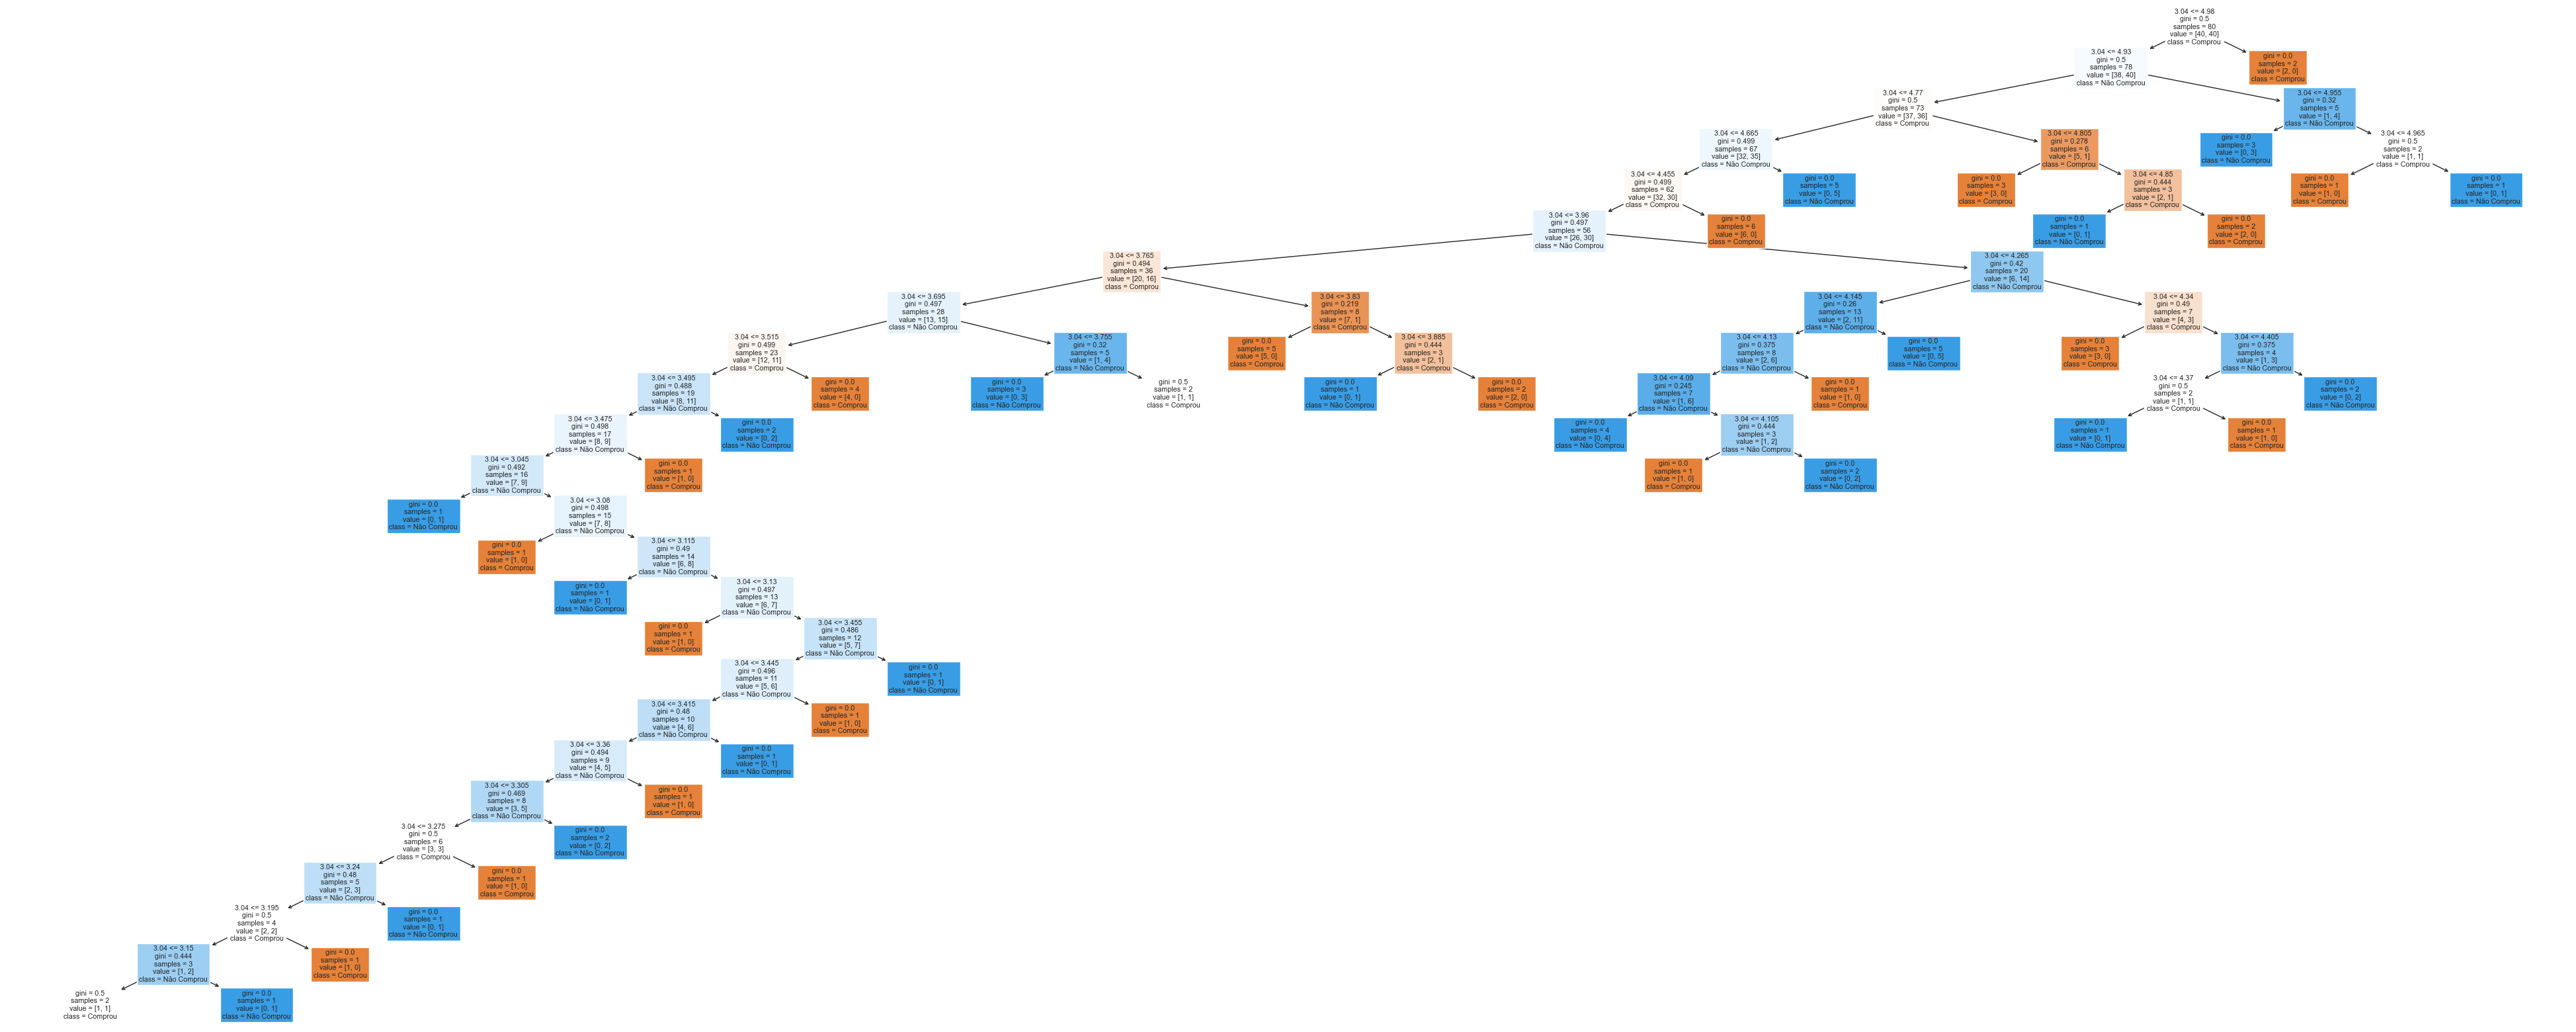

In [140]:
#criando modelos de teste

notas_treino, notas_teste, compra_treino, compra_teste = train_test_split(notas.reshape(-1,1), compras.reshape(-1,1), test_size = 0.2, random_state= 42) # reshape, organizar o dataframe 


modelo = DecisionTreeClassifier()
modelo.fit(notas_treino, compra_treino)

fig = plt.figure(figsize=(50,20))
tree.plot_tree(modelo,feature_names= notas.tolist(), class_names = compras.tolist(), filled= True)

In [137]:
#Calculando as métricas de precisão
previsoes = modelo.predict(notas_teste)
print(notas_teste)

accuracy = accuracy_score(compra_teste, previsoes)
print(accuracy)


<PandasArray>
[
[4.36],
[4.24],
[4.01],
[4.98],
[3.45],
[4.31],
[4.49],
[3.38],
[4.43],
[3.04],
[4.18],
[3.02],
[3.04],
[4.45],
[3.99],
[5.0],
[3.87],
[3.69],
[4.42],
[4.12]
]
Shape: (20, 1), dtype: float64
0.6
